# Compute Baseline for Yearly Aggregated Data

<a id='top'></a>

<a href=#readdata>Read in Data</a>

<a href=#overall_probability>Overall Probability of moving in Dataset</a>

<a href=#move_by_year>Move Probability by Year</a>

<a href=#prob_company_moves>Probability that Company Moves</a>

<a href=#prob_branch_moves>Probability that Branch Moves</a>

<a href=#plot_probabilities>Plot Probabilities</a>

<a href=#bottom>End of File</a>


In [1]:

import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns


<a id='readdata'></a>
# Read in data

<a href=#top>Top</a>

In [2]:
# Ignore 'dask' warning
import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
from datetime import date
import numpy as np

# Setting up constants. All required
project = 'graydon-moving-indicator'
bucket_name = 'graydon-data'

# Initializing bucket
fs = gcsfs.GCSFileSystem(project='graydon-moving-indicator')
gcs = storage.Client()
bucket = gcs.get_bucket(bucket_name)

# Post-aggregation
def create_dict_types_aggregated_data():
    # Setting up dictionary of column types for the aggregated dataset
    dtype={ 
        'id_company'  :np.float64,
        'id_branch'    :np.int64, 
        'code_sbi_2'         : np.float64, 
        'has_relocated':bool,
        'has_relocated_next_year ' : bool,
        'has_name_change' : bool,
        'qty_address_mutations_total' :np.float64,
        'ratio_operating_result_consolidated_operating_result': np.float64,
        'ratio_revenue_consolidated_revenue': np.float64,
        'qty_green_flags'   :np.float64,
        'qty_orange_flags'   :np.float64,
        'qty_red_flags'   :np.float64,
        'A'   :np.float64,
        'AA'   :np.float64,
        'AAA'   :np.float64,
        'B'   :np.float64,
        'BB'   :np.float64,
        'BBB'   :np.float64,
        'C'   :np.float64,
        'CC'   :np.float64,
        'CCC'   :np.float64,
        'D'   :np.float64,
        'NR'   :np.float64,
        'code_legal_form_group_1':  np.int64,
        'code_legal_form_group_2':  np.int64,
        'SBI_group_1':  np.int64,
        'SBI_group_2':  np.int64,
        'company_age'   :np.float64,
        'years_since_last_amt_consolidated_operating_result'   :np.float64,
        'years_since_last_amt_consolidated_revenue'   :np.float64,
        'years_since_last_amt_operating_result'   :np.float64,
        'years_since_last_qty_employees'   :np.float64,
        'years_since_last_amt_revenue'   :np.float64,
        'delta_qty_employees'   :np.float64,
        'delta_qty_issued_credit_reports'   :np.float64,
        'delta_score_payment_assessment'   :np.float64,
        'SBI_has_changed' : bool,
        'unique_id' : object,
        'code_legal_form_has_changed ' : bool,
        'is_discontinued_any ' : bool,
        'has_financial_calamity ' : bool,
        'mean_amt_consolidated_operating_result'   :np.float64,
        'mean_amt_consolidated_revenue'   :np.float64,
        'mean_amt_operating_result'   :np.float64,
        'mean_amt_revenue'   :np.float64,
        'mean_qty_employees'   :np.float64,
        'mean_qty_issued_credit_reports'   :np.float64,
        'mean_score_payment_assessment'   :np.float64,
        'mean_score_pd'   :np.float64,
        'qty_address_mutations_year'   :np.float64,
        'qty_started_names_year'   :np.float64,
        'qty_stopped_names_year'   :np.float64,
        'qty_board_changes_year'   :np.float64,
        'variance_qty_employees'   :np.float64,
        'variance_qty_issued_credit_reports'   :np.float64,
        'variance_score_payment_assessment'   :np.float64,
        'variance_score_pd'   :np.float64
      }
    return dtype

def create_parse_dates_list_aggregated_data():
    # Setting up dictionary of column types for the aggregated dataset
    parse_dates= ['date_month', 'years_in_current_location']
    return parse_dates

def create_basetable(year_list, dir_prefix = ''):
    """ Reads a whole year of data from the already aggregated files and creates basetable """
    dtype = create_dict_types_aggregated_data()
    parse_dates = create_parse_dates_list_aggregated_data()
    basetable = pd.DataFrame()
    for year in year_list:
        full_year_df = pd.DataFrame()
        print('Starting with year: ', year)
        print(dir_prefix)
        blob_list = list(bucket.list_blobs(prefix=dir_prefix))    
        for blob in blob_list:  
            if year in blob.name:
                print('Processing file: ', blob.name)
                with fs.open('graydon-data/' + blob.name) as f:
                    full_year_df = pd.read_csv(f, sep=',', index_col=0, dtype=dtype, parse_dates=parse_dates 
                                            )   
                print('The number of rows of the year read is far is: ', full_year_df.shape[0])
        basetable = basetable.append(full_year_df)
    print('The final number of rows of the basetable created is: ', basetable.shape[0])
    return basetable

# Calling it
data_df = create_basetable(year_list = ['2013', '2014', '2015', '2016', '2017'], dir_prefix ='03_aggregated')
#data_df = create_basetable(year_list = ['2015', '2016'], dir_prefix ='03_aggregated')

Starting with year:  2013
03_aggregated
Processing file:  03_aggregated/2013_aggregated.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (4,58) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The number of rows of the year read is far is:  1811253
Starting with year:  2014
03_aggregated
Processing file:  03_aggregated/2014_aggregated.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


The number of rows of the year read is far is:  1852836
Starting with year:  2015
03_aggregated
Processing file:  03_aggregated/2015_aggregated.csv
The number of rows of the year read is far is:  1890941
Starting with year:  2016
03_aggregated
Processing file:  03_aggregated/2016_aggregated.csv
The number of rows of the year read is far is:  1930102


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Starting with year:  2017
03_aggregated
Processing file:  03_aggregated/2017_aggregated.csv
The number of rows of the year read is far is:  1966208
The final number of rows of the basetable created is:  9451340


In [3]:
data_df.columns

Index(['A', 'AA', 'AAA', 'B', 'BB', 'BBB', 'C', 'CC', 'CCC', 'D', 'NR',
       'SBI_group_1', 'SBI_group_2', 'SBI_has_changed',
       'code_legal_form_group_1', 'code_legal_form_group_2',
       'code_legal_form_has_changed', 'code_sbi_1', 'company_age',
       'date_month', 'delta_qty_employees', 'delta_qty_issued_credit_reports',
       'delta_score_payment_assessment', 'has_financial_calamity',
       'has_name_change', 'has_relocated', 'has_relocated_next_year',
       'id_branch', 'id_company', 'is_discontinued_any',
       'mean_amt_consolidated_operating_result',
       'mean_amt_consolidated_revenue', 'mean_amt_operating_result',
       'mean_amt_revenue', 'mean_qty_employees',
       'mean_qty_issued_credit_reports', 'mean_score_payment_assessment',
       'mean_score_pd', 'qty_address_mutations_year', 'qty_board_changes_year',
       'qty_green_flags', 'qty_orange_flags', 'qty_red_flags',
       'qty_started_names_year', 'qty_stopped_names_year',
       'ratio_operating_resu

In [4]:
data_df.head()

,A,AA,AAA,B,BB,BBB,C,CC,CCC,D,...,variance_qty_employees,variance_qty_issued_credit_reports,variance_score_payment_assessment,variance_score_pd,years_in_current_location,years_since_last_amt_consolidated_operating_result,years_since_last_amt_consolidated_revenue,years_since_last_amt_operating_result,years_since_last_amt_revenue,years_since_last_qty_employees
0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,nan,NaN,NaN,NaN,NaN,NaN


In [5]:
data_df['year'] = pd.DatetimeIndex(data_df['date_month']).year

In [6]:
data_df.groupby(['year']).agg(['mean', 'count'])

A                 AA                AAA                  B  \
          mean    count      mean    count      mean    count      mean   
year                                                                      
2013  0.279728  1811253  0.302095  1811253  0.351358  1811253  0.333661   
2014  1.155903  1852836  1.313344  1852836  1.391613  1852836  1.294176   
2015  1.424809  1890941  1.055624  1890941  1.075311  1890941  1.443624   
2016  1.408117  1930102  1.414238  1930102  1.362432  1930102  1.257891   
2017  1.476761  1966208  1.541377  1966208  1.415096  1966208  1.174341   

                     BB            ...     \
        count      mean    count   ...      
year                               ...      
2013  1811253  0.610037  1811253   ...      
2014  1852836  2.205304  1852836   ...      
2015  1890941  1.898849  1890941   ...      
2016  1930102  1.591608  1930102   ...      
2017  1966208  1.453042  1966208   ...      

     years_since_last_amt_consolidated_operating_result         \
                                                   mean  count   
year                                                             
2013                                           4.289538  59284   
2014                                           4.349037  56779   
2015                                           4.348976  55276   
2016                                           4.435047  54185   
2017                                           4.481443  52110   

     years_since_last_amt_consolidated_revenue         \
                                          mean  count   
year                                                    
2013                                  4.793992  41445   
2014                                  5.044156  39632   
2015                                  4.898619  36940   
2016                                  4.905722  35512   
2017                                  4.903499  33378   

     years_since_last_amt_operating_result         \
                                      mean  count   
year                                                
2013                              4.289538  59284   
2014                              4.349037  56779   
2015                              4.348976  55276   
2016                              4.435047  54185   
2017                              4.481443  52110   

     years_since_last_amt_revenue         years_since_last_qty_employees  \
                             mean   count                           mean   
year                                                                       
2013                     5.628473  109346                       3.180230   
2014                     6.072105  102281                       3.082765   
2015                     6.296769   91765                       1.288943   
2016                     6.368328   81479                       1.118526   
2017                     6.355618   69780                       0.941729   

               
        count  
year           
2013  1517031  
2014  1558385  
2015  1596870  
2016  1635148  
2017  1683571  

[5 rows x 106 columns]

In [7]:
data_df.groupby(['year']).size()

year
2013    1811253
2014    1852836
2015    1890941
2016    1930102
2017    1966208
dtype: int64

In [8]:
data_df[data_df.has_relocated_next_year.isna()] = 0

<a id='overall_probability'></a>

# Overall Probability that branch moves 

<a href=#top>Top</a>

In [9]:
data_df['has_relocated_next_year'].value_counts()

False    8974071
True      477269
Name: has_relocated_next_year, dtype: int64

In [10]:
data_df['has_relocated_next_year'].value_counts() / data_df.shape[0]

False    0.949503
True     0.050497
Name: has_relocated_next_year, dtype: float64

<a id='move_by_year'></a>
# Move Probability By Year:
<a href=#top>Top</a>

In [11]:
data_df.groupby(['year'])['has_relocated_next_year'].value_counts() 

year  has_relocated_next_year
0     False                       367287
2013  False                      1670754
      True                         72505
2014  False                      1678925
      True                        100264
2015  False                      1708652
      True                        110237
2016  False                      1741379
      True                        111461
2017  False                      1807074
      True                         82802
Name: has_relocated_next_year, dtype: int64

In [14]:
data_df.groupby(['year'])['unique_id'].nunique() 

year
0             1
2013    1743259
2014    1779189
2015    1818889
2016    1852840
2017    1889876
Name: unique_id, dtype: int64

In [13]:
year_to_check = [2013, 2014, 2015, 2016, 2017]
#year_to_check = [2015]

for this_year in year_to_check: 
    print(this_year, "\n",
          data_df[data_df.year==this_year]['has_relocated_next_year'].value_counts() / data_df[data_df.year==this_year].shape[0])

2013 
 False    0.958408
True     0.041592
Name: has_relocated_next_year, dtype: float64
2014 
 False    0.943646
True     0.056354
Name: has_relocated_next_year, dtype: float64
2015 
 False    0.939393
True     0.060607
Name: has_relocated_next_year, dtype: float64
2016 
 False    0.939843
True     0.060157
Name: has_relocated_next_year, dtype: float64
2017 
 False    0.956187
True     0.043813
Name: has_relocated_next_year, dtype: float64



<a id='prob_company_moves'></a>
# Probability that company moves over the whole dataset:

<a href=#top>Top</a>


Calculate the probability that any company has a branch that moves in the dataset.  Companies that have multiple moves do not affect the probability of move.

In [15]:
# Find number of unique companies:
num_unique_companies=data_df['id_company'].nunique()
print("The total number of companies in the dataset is %0.3d" % num_unique_companies) 

The total number of companies in the dataset is 2007430


In [16]:
num_companies_moved = data_df[data_df.has_relocated_next_year==True]['id_company'].nunique()
print("The number of companies involved in a move is %0.3d" % num_companies_moved) 

The number of companies involved in a move is 401296


In [17]:
prob_company_moved = num_companies_moved/ num_unique_companies
print("The probability that a company has a branch that moved is %8.3f %%" % (100*prob_company_moved)) 

The probability that a company has a branch that moved is   19.991 %


## By Year:

In [18]:
year_to_check = [2013, 2014, 2015, 2016, 2017]

for this_year in year_to_check:
    num_cs = data_df[data_df.year==this_year]['id_company'].nunique()
    num_moved = data_df[(data_df.year==this_year) & (data_df.has_relocated_next_year==True)]['id_company'].nunique()
    print(this_year, "\n", num_moved / num_cs)

2013 
 0.04540728448669465
2014 
 0.06119873584686782
2015 
 0.06543979240695494
2016 
 0.06456594856762066
2017 
 0.04680167605705871


<a id='prob_branch_moves'></a>
## Probability that a branch moves:

<a href=#top>Top</a>

In [19]:
num_unique_branches=data_df['unique_id'].nunique()
print("The total number of branches in the dataset is %0.3d" % num_unique_branches) 

The total number of branches in the dataset is 2175130


In [20]:
num_branches_moved = data_df[data_df.has_relocated_next_year==True]['unique_id'].nunique()
print("The number of branches involved in a move is %0.3d" % num_branches_moved) 

The number of branches involved in a move is 405535


In [21]:
prob_branch_moved = num_branches_moved/ num_unique_branches
print("The probability that a branch moved is %8.3f %%" % (100*prob_branch_moved)) 

The probability that a branch moved is   18.644 %


## Branch move probability by Year:

In [22]:
year_to_check = [2013, 2014, 2015, 2016, 2017]

for this_year in year_to_check:
    num_cs = data_df[data_df.year==this_year]['unique_id'].nunique()
    num_moved = data_df[(data_df.year==this_year) & (data_df.has_relocated_next_year==True)]['unique_id'].nunique()
    print(this_year, "\n", num_moved / num_cs)

2013 
 0.04159163956704081
2014 
 0.05635376567638402
2015 
 0.060606776994088146
2016 
 0.060156840310010576
2017 
 0.043813456544238884


<a id='plot_probabilities'></a>
# Plot Probabilities


<a href=#top>Top</a>

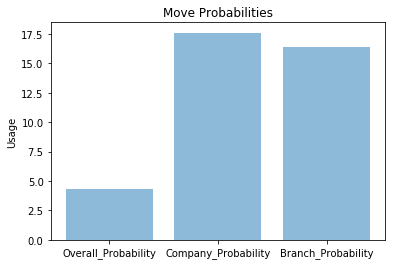

In [50]:
prob_moved = data_df[data_df.has_relocated_next_year==True].shape[0]/ data_df.shape[0]

x_labels = ("Overall_Probability", "Company_Probability", "Branch_Probability")
y_pos = np.arange(len(x_labels))
all_probabilities = [prob_moved, prob_company_moved, prob_branch_moved]

all_probabilities = [i * 100 for i in all_probabilities]
 
plt.bar(y_pos, all_probabilities, align='center', alpha=0.5)
plt.xticks(y_pos, x_labels)
plt.ylabel('Usage')
plt.title('Move Probabilities')
 
plt.show()

<a id='bottom'></a>

<a href=#top>Top</a>

# End